# Project: Lending Club 

Lending Club is a marketplace for personal loans, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). In this case study, you will learn about the basic understanding of risk analytics in Lending Club Company and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding

The Consumer Finance Company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

The problem is they don’t know whether the customer is good customer or bad customer.

They don’t know driving factors behind loan default, i,e the variables which are strong indicators of default. Defaulted customers are who not paying the loan continuously.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

#### 1. Loan accepted: 

If the company approves the loan, there are 3 possible scenarios described below:
                
                * Fully Paid
                * Current (Paying the installments)
                * Charged-off (Defaluted)


#### 2. Loan Rejected:
The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')
from datetime import datetime

pd.options.display.float_format = '{:.2f}'.format

<h3>Importing Datafile</h3>

In [481]:
loans = pd.read_csv("Data\loan.csv", low_memory=False)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


<h3>Dataset Overview</h3>

In [482]:
loans.info(max_cols=112)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

Dataset has 39717 enteries with 111 columns.

<h3>Data Cleaning</h3>

<b>1. Removing Columns will all N.A. values:</b>

In [483]:
print(loans['loan_status'].value_counts())


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [484]:
loans.info(max_cols=112)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

A lot of columns in the dataset are completely null. Dropping columns with all null values.

In [485]:
loans = loans.dropna(axis=1, how="all")
print("Dataset after removing all null columns:")
print(loans.info(max_cols=112))


Dataset after removing all null columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  obj

54 of the intial 111 columns were completely null.

<b>2. Removing columns with mostly null values which will not be considered for analysis.</b>

In [486]:
# Columns - next_pymnt_d, mths_since_last_delinq and mths_since_last_record have too 
# few non-null values, hence are not suitable to be used for analysis. Dropping these columns.

mostlyNullCols = ["next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record"]
loans.drop(mostlyNullCols, axis=1, inplace=True)

In [487]:
loans.info(max_cols=120)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<b>3. Removing columns that are not useful for finding loan defaulters</b>

In [488]:
# Removing the following Columns not needed for defaulters analysis:
# id - not required
# member_id - not required
# emp_title - brand names not useful
# url - not useful
# desc - can be applied some NLP but not for EDA
# title - too many distinct values not useful
# zip_code - complete zip is not available
# delinq_2yrs - post approval feature
# revol_bal - post/behavioural feature

#----------------------------------------------------------------------------------

# Removing the following Columns as they have only a single value or majority records having a single value:
# policy_code
# acc_now_delinq 
# collections_12_mths_ex_med
# tax_liens
# delinq_amnt
# application_type 
# pub_rec_bankruptcies
# initial_list_status
# acc_now_delinq 
# pymnt_plan
# chargeoff_within_12_mths

#----------------------------------------------------------------------------------

# Removing features which do not seem relevant for Defaulter analysis on completed loans(Fully paid/Charged off)
# out_prncp - Relevant  for ongoing loans
# out_prncp_inv - Relevant  for ongoing loans
# total_pymnt - Relevant  for ongoing loans
# total_pymnt_inv - Relevant  for ongoing loans
# total_rec_prncp - Relevant  for ongoing loans
# total_rec_int - Relevant  for ongoing loans
# total_rec_late_fee - Relevant  for ongoing loans
# recoveries - not relevant for defaulter analysis
# collection_recovery_fee - not relevant for defaulter analysis
# last_credit_pull_d - not relevant for defaulter analysis
# last_pymnt_amnt - post feature
# next_pymnt_d - post feature
# funded_amnt - not useful, funded_amnt_inv is useful which is funded to person
# addr_state - may not depend on location as its in financial domain





colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title",
              "zip_code", "delinq_2yrs", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", 
              "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
              "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", 
              "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq",
              "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", 
              "pub_rec_bankruptcies", "addr_state"]
loans.drop(colsToDrop, axis=1, inplace=True)


In [489]:
# Dataset with all features relevant for analysis
print("Relevant Features",list(loans.columns))


Relevant Features ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


<b>4. Finding  remaining records with any Null values</b>

In [490]:
loans.columns[loans.isnull().any()]

Index(['emp_length', 'revol_util'], dtype='object')

In [491]:
loans['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Checking the percentage of records with missing values:

In [493]:
# Finding percentage of rows with missing 'emp_length' valaues
print("Percentage of rows with missing emp_length:",round((loans['emp_length'].isnull().sum()/loans.shape[0])*100,1))

# Finding percentage of rows with missing 'revol_util' values
print("Percentage of rows with missing revol_util:",round((loans['revol_util'].isnull().sum()/loans.shape[0])*100,1))


Percentage of rows with missing emp_length: 2.7
Percentage of rows with missing revol_util: 0.1


Since only a small number of rows relative to the total records have missing values for 'emp_length' and 'revol_util', removing these records.

In [494]:
#Dropping rows with NA values
loans.dropna(axis=0, subset=["emp_length"], inplace=True)
loans.dropna(axis=0, subset=["revol_util"], inplace=True)

In [495]:
loans.columns[loans.isnull().any()]


Index([], dtype='object')

We dont have any NA values in the dataset.

<b>5. Standardizing the data </b>

In [496]:
loans.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [497]:
#Converting term,int_rate and revol_util to numeric type.
loans["term"] = pd.to_numeric(loans["term"].apply(lambda x:x.split()[0]))
loans["int_rate"] = pd.to_numeric(loans["int_rate"].apply(lambda x:x.split('%')[0]))
loans["revol_util"] = pd.to_numeric(loans["revol_util"].apply(lambda x:x.split('%')[0]))

#Coverting emp_length to numeric values
#Assuming 'emp_length' = '< 1 year' as 0 ,and
# emp_length' = '10+ years' as 10
loans["emp_length"] = pd.to_numeric(loans["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [498]:
loans[["emp_length","term","int_rate","revol_util"]].head()

,emp_length,term,int_rate,revol_util
0,10,36,10.65,83.70
1,0,60,15.27,9.40
2,10,36,15.96,98.50
3,10,36,13.49,21.00
4,1,60,12.69,53.90


In [499]:
print(loans['loan_status'].value_counts())

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64


<b>6. Loans that have loan_status as 'Current' cannot be used for analysis as the installment payment is ongoing. Removing such records.</b>

In [500]:
loans= loans.loc[loans['loan_status']!='Current']
# df.loc[df['column_name'] == some_value]
print(loans['loan_status'].value_counts())

Fully Paid     32113
Charged Off     5384
Name: loan_status, dtype: int64


In [501]:
loans.shape

(37497, 21)

<b> 7. Handling Large Outliers </b>

In [502]:
loans.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00
mean,11127.36,10288.80,41.92,11.96,324.86,4.94,69436.53,13.29,0.87,9.30,0.05,48.86,22.10
std,7353.97,7033.95,10.35,3.68,208.91,3.56,64672.08,6.66,1.07,4.39,0.23,28.34,11.41
min,500.00,0.00,36.00,5.42,15.69,0.00,4000.00,0.00,0.00,2.00,0.00,0.00,2.00
25%,5500.00,5000.00,36.00,8.94,167.53,2.00,41000.00,8.16,0.00,6.00,0.00,25.40,13.00
50%,10000.00,8875.00,36.00,11.83,280.26,4.00,60000.00,13.39,1.00,9.00,0.00,49.30,20.00
75%,15000.00,14100.00,36.00,14.42,429.35,9.00,83000.00,18.55,1.00,12.00,0.00,72.40,29.00
max,35000.00,35000.00,60.00,24.40,1305.19,10.00,6000000.00,29.99,8.00,44.00,4.00,99.90,90.00


Values for installment, annual_inc, open_acc, pub_rec and total_acc have large outliers compared to their corresponding mean values.

Max value for annual_inc is 600000 which is very high compared to mean(69436.53) and 75th percentile value(83000).
Removing few top values.

In [503]:
annual_inc_OL = loans['annual_inc'].quantile(0.99)
loans = loans[loans["annual_inc"] <= annual_inc_OL]
loans["annual_inc"].describe()

count    37127.00
mean     65974.99
std      35231.92
min       4000.00
25%      41000.00
50%      59000.00
75%      81870.00
max     235000.00
Name: annual_inc, dtype: float64

Max value for pub_rec is 4 which is very high compared to mean(0.05) and 75th percentile value(0).
Removing few top values.

In [504]:
pub_rec_OL = loans['pub_rec'].quantile(0.995)
loans = loans[loans["pub_rec"] <= pub_rec_OL]
loans["pub_rec"].describe()

count   37073.00
mean        0.05
std         0.22
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: pub_rec, dtype: float64

Max value for installment is 1305 which is very high compared to mean(324) and 75th percentile value(430).
Removing few top values.

In [505]:
installemnts_OL = loans['installment'].quantile(0.994)
loans = loans[loans["installment"] <= installemnts_OL]
loans["installment"].describe()

count   36850.00
mean      317.59
std       197.12
min        15.69
25%       166.50
50%       277.54
75%       421.01
max       982.79
Name: installment, dtype: float64

Max value for total_acc is 90 which is very high compared to mean(22) and 75th percentile value(29).
Removing few top values.

In [506]:
total_acc_OL = loans['total_acc'].quantile(0.98)
loans = loans[loans["total_acc"] <= total_acc_OL]
loans["total_acc"].describe()

count   36142.00
mean       21.30
std        10.33
min         2.00
25%        13.00
50%        20.00
75%        28.00
max        50.00
Name: total_acc, dtype: float64

Max value for open_acc is 44 which is very high compared to mean(9.4) and 75th percentile value(12).
Removing few top values.

In [507]:
open_acc_OL = loans['open_acc'].quantile(0.97)
loans = loans[loans["open_acc"] <= open_acc_OL]
loans["open_acc"].describe()

count   35117.00
mean        8.76
std         3.68
min         2.00
25%         6.00
50%         8.00
75%        11.00
max        18.00
Name: open_acc, dtype: float64

<b>Dataset after initial processing:</b>

In [508]:
loans.info(max_cols=112)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35117 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35117 non-null  int64  
 1   funded_amnt_inv      35117 non-null  float64
 2   term                 35117 non-null  int64  
 3   int_rate             35117 non-null  float64
 4   installment          35117 non-null  float64
 5   grade                35117 non-null  object 
 6   sub_grade            35117 non-null  object 
 7   emp_length           35117 non-null  int64  
 8   home_ownership       35117 non-null  object 
 9   annual_inc           35117 non-null  float64
 10  verification_status  35117 non-null  object 
 11  issue_d              35117 non-null  object 
 12  loan_status          35117 non-null  object 
 13  purpose              35117 non-null  object 
 14  dti                  35117 non-null  float64
 15  earliest_cr_line     35117 non-null 

<h3> Derived Metrics</h3>

In [509]:
loans.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [510]:
loans['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Issue date column has date in a non standard format, we can derive a 'year' and 'month' column from 'issue_d'.

In [511]:
#Converting issue_d to standard datetime values.

loans['issue_d'] = loans['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [512]:
# Deriving Year and Month from 'issue_d'

loans['issue_year'] = loans['issue_d'].apply(lambda x: x.year)
loans['issue_month'] = loans['issue_d'].apply(lambda x: x.month)
loans[['issue_year','issue_month']].head()

,issue_year,issue_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
5,2011,12


<b>Creating Bins for columns with continuous numeric values (annual_inc, int_rate,installments etc.)</b>

In [516]:
# annual_inc range bins
bins = [0, 25000, 50000, 75000, 100000, 1000000]
income_range = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loans['annual_inc_range'] = pd.cut(loans['annual_inc'], bins, labels=income_range)

In [517]:
loans['annual_inc'].head()

0   24000.00
1   30000.00
2   12252.00
3   49200.00
5   36000.00
Name: annual_inc, dtype: float64

In [518]:
loans['annual_inc_range'].head()

0        0-25000
1    25000-50000
2        0-25000
3    25000-50000
5    25000-50000
Name: annual_inc_range, dtype: category
Categories (5, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000-100000' < '100000+']

Similarly , bins creation done for all the relevant features

In [519]:
# int_rate range bins
bins = [0, 7.5, 10, 12.5, 15, 100]
interest_range = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loans['int_rate_range'] = pd.cut(loans['int_rate'], bins, labels=interest_range)

In [520]:
# loan_amnt range bins
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
loan_amount_range = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loans['loan_amnt_range'] = pd.cut(loans['loan_amnt'], bins, labels=loan_amount_range)

In [521]:
# installment range bins
bins = [0, 200, 400, 600, 800, 1000]
loan_amount_range = ['0-200', '200-400', '400-600', '600-800','800+']
loans['installment_range'] = pd.cut(loans['installment'], bins, labels=loan_amount_range)

In [522]:
# dti range bins
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_range = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loans['dti_range'] = pd.cut(loans['dti'], bins, labels=dti_range)

<b>Changing the loan status for Fully Paid to 0 and Charged Off to 1, to represent the defaulters numerically as a ratio</b>

In [523]:
# update loan_status as Fully Paid to 0 and Charged Off to 1
loans["loan_status"] = loans["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
print(loans["loan_status"].value_counts())

0    30056
1     5061
Name: loan_status, dtype: int64


<h3>Data Analysis </h3>

<b>Univariate Analysis</b>

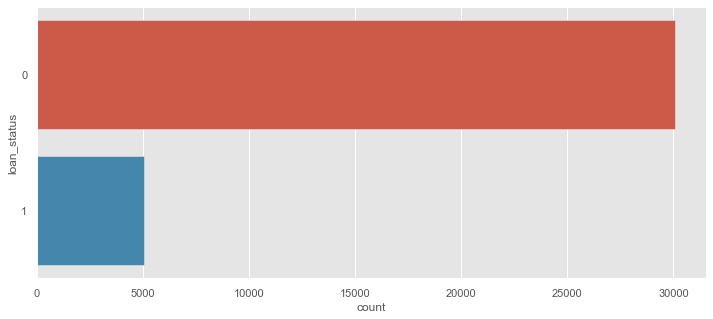

In [524]:
# check for amount of defaulters in the data using countplot
# loan_status = 1 represnts defaulters
plt.figure(figsize=(12,5))
sns.countplot(y="loan_status", data=loans)
plt.show()

Approx 15% of the total records (5061 out of 35117) are defaulters.

We will anlayse the impact of the features in terms of the ratio of defaulters in that particular category.
This ratio is of number of defaulters to total count in that category, which is plotted on the Y  axis for univariate analyis.

Plotting function for univariate bar plots

In [525]:
def univariateBarPlot(x, title, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loans)
    plt.title(title)
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Ratio of Defaulters / Total", fontsize=16)
    plt.show()

In [526]:
loans.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'issue_year', 'issue_month',
       'earliest_cr_line_year', 'annual_inc_range', 'int_rate_range',
       'loan_amnt_range', 'installment_range', 'dti_range'],
      dtype='object')

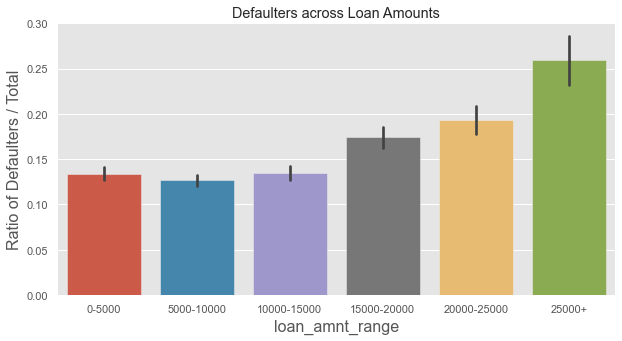

In [527]:
# Defaulters across different loan amount range
univariateBarPlot("loan_amnt_range","Defaulters across Loan Amounts")


The ratio of defaulters increases for a particular loan amount range as the loan amount increases.
Defaulting on payment is dependent on loan amount.

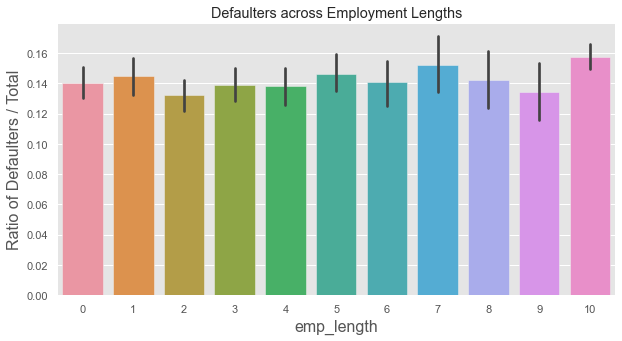

In [528]:
# Defaulters across different employment lengths
univariateBarPlot("emp_length","Defaulters across Employment Lengths")

The ratio of defaulters does not show any particular patter wrt the employment length. The defaulters ratio is somewhat constant across different lengths of employment.

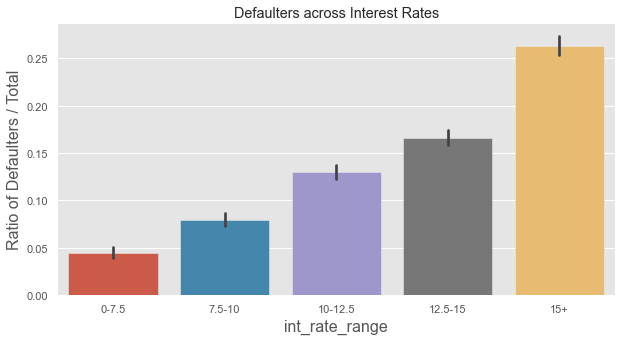

In [529]:
# Defaulters across different interest rates
univariateBarPlot("int_rate_range","Defaulters across Interest Rates")

Defaulter ratio is higher for a Increase in interest rate of the loan increases the ratio of defaulters as well. Higher the interest rate more are the defaulters for that particular group.higer interest rate.

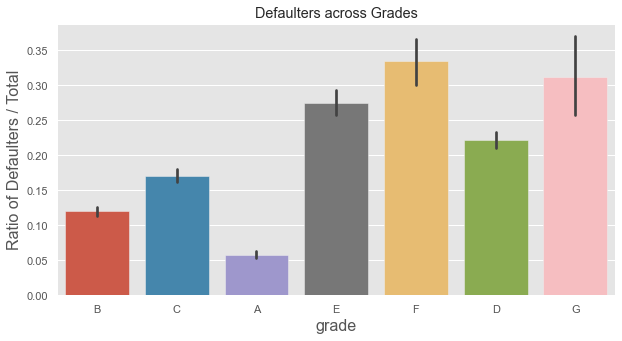

In [530]:
# Defaulters across different grades
univariateBarPlot("grade","Defaulters across Grades")


Defaulters for a particular grade increase as the grade value goes from A to G.
It can be inferred that defaulting is more likely if the grade is worse( A being the best grade and G the worse).

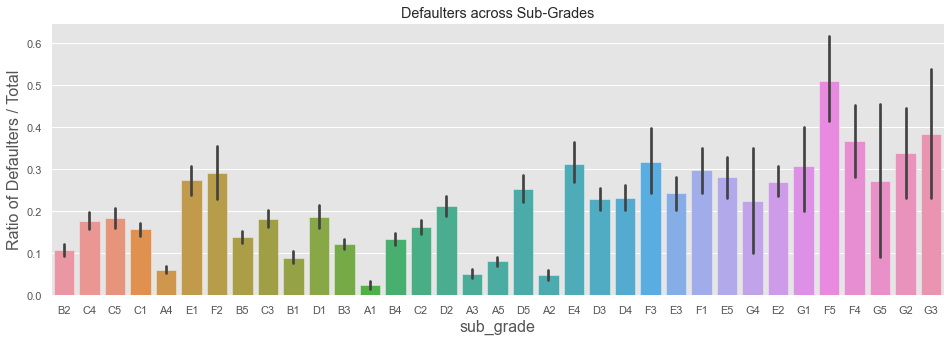

In [531]:
# Defaulters across different sub-grades
univariateBarPlot("sub_grade","Defaulters across Sub-Grades",figsize=(16,5))


Similar to the dependency on Grade, the defaulters ratio increases with sub_grade i.e.
going from A1 to G5 , the defaulters for any particular sub grade increase.

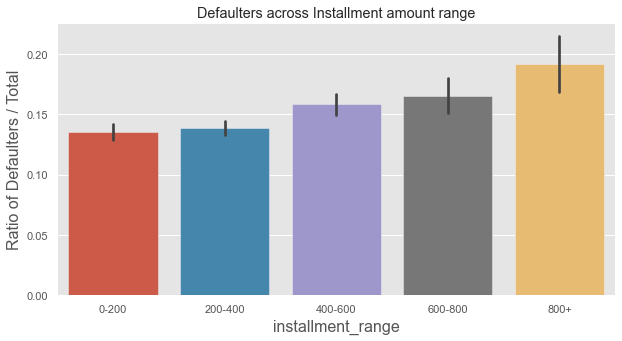

In [532]:
# Defaulters across different installment range
univariateBarPlot("installment_range","Defaulters across Installment amount range")

Higher the installment, more are the defaulters in that installment range.


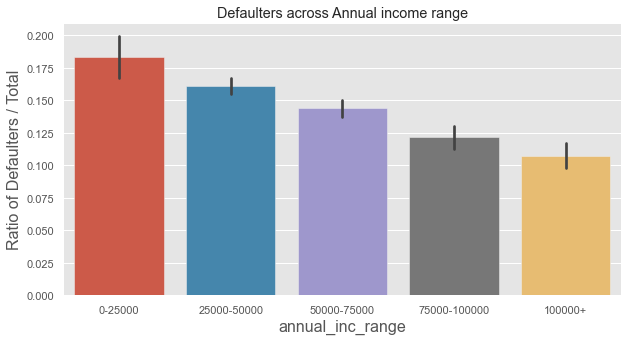

In [533]:
# Defaulters across different Annual Incomes
univariateBarPlot("annual_inc_range","Defaulters across Annual income range")

Annual income shows an inverse relationship with the ratio of defaulters.
Higher income leads to less defaulting on payments.

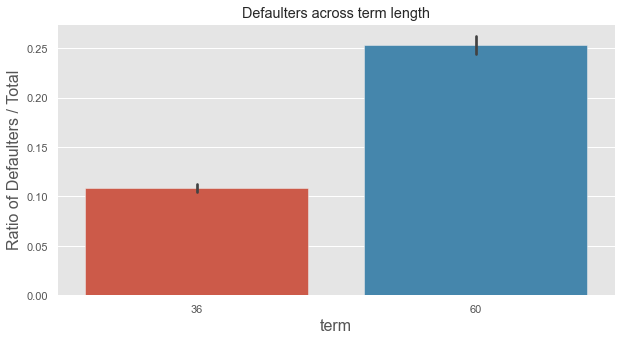

In [534]:
# Defaulters across different terms
univariateBarPlot("term","Defaulters across term length")

Loans with longer term lengths have a greater defaulter ratio.

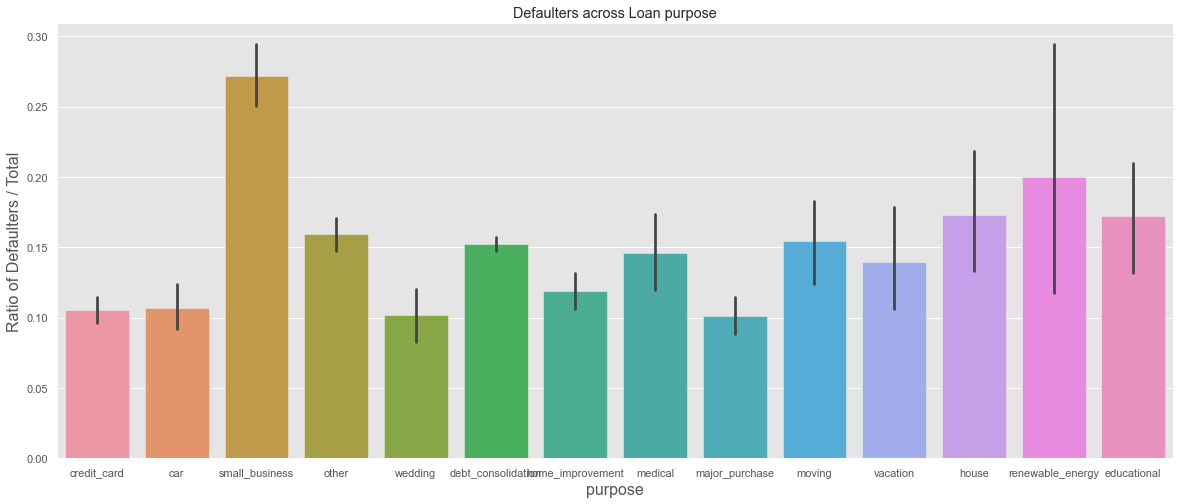

In [535]:
# Defaulters across different loan purpose
univariateBarPlot("purpose","Defaulters across Loan purpose",figsize=(20,8))

The purpose of the loan has some dependency as the defaulter ratio shows some variation wrt to loan purpose.
This could be used for further analysis

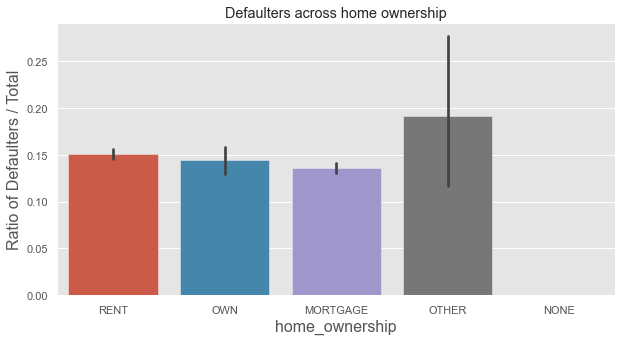

In [536]:
# Defaulters across different home ownership
univariateBarPlot("home_ownership","Defaulters across home ownership")

The ratio for defaulters does not show any major dependency on home_ownership apart from values under Others.
Since there is no specific information regarding what data Others consists of, dependency of home ownership wrt defaulters is not obvious. 

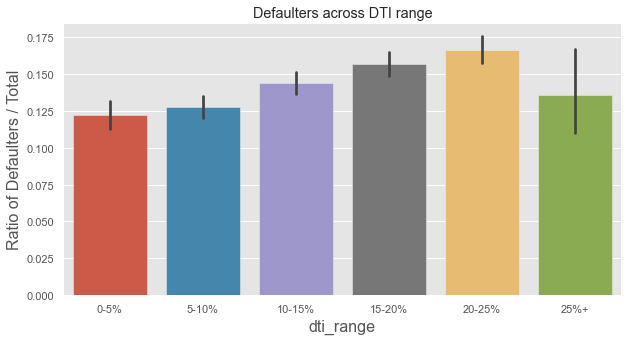

In [537]:
# Defaulters across different dti range
univariateBarPlot("dti_range","Defaulters across DTI range")

Defaulters seem to increase with increase in DTI for the borrower.

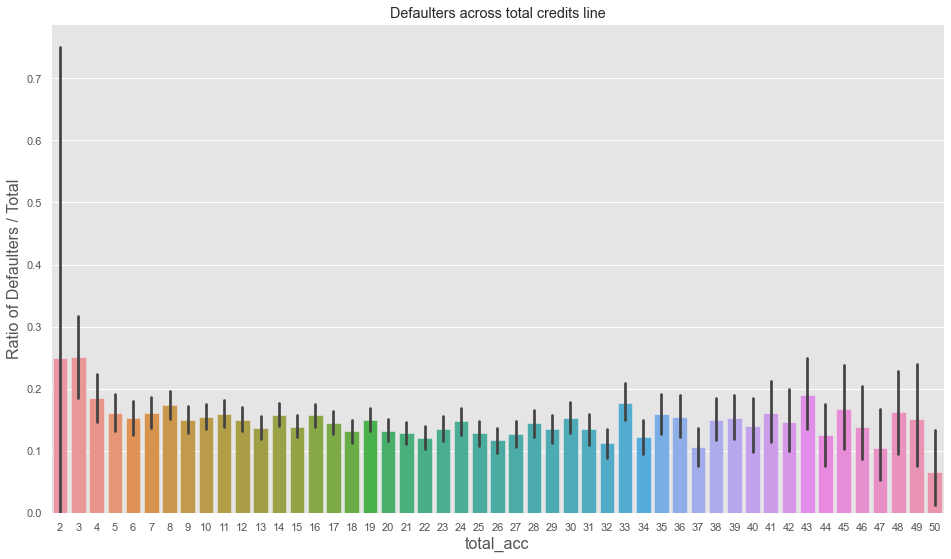

In [538]:
# Defaulters across different total credits line
univariateBarPlot("total_acc","Defaulters across total credits line",figsize=(16,9))

There is no significant variation of Defaulters wrt most values under total credit lines.

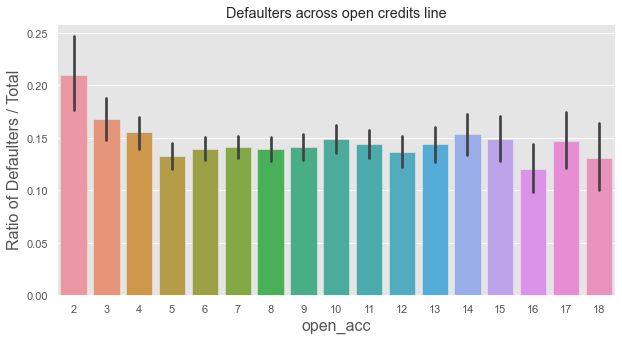

In [539]:
# Defaulters across different open credit lines
univariateBarPlot("open_acc","Defaulters across open credits line")

Similar to total credits , the defaulter ratio does not show a strong dependency on open credit lines.

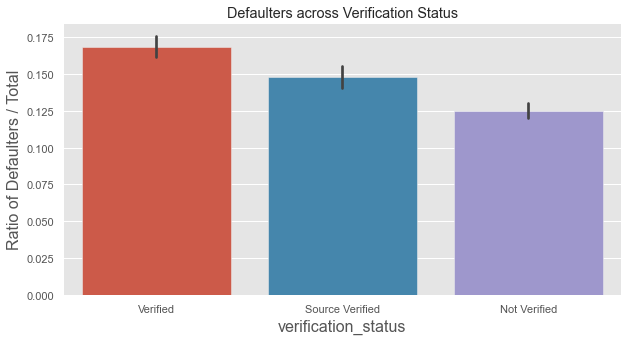

In [540]:
# Defaulters across different verfication status
univariateBarPlot("verification_status","Defaulters across Verification Status")

The defaulter ratio is nearly constant with 13% to 16% for verification status categories. No significant difference is seen for verfication status.

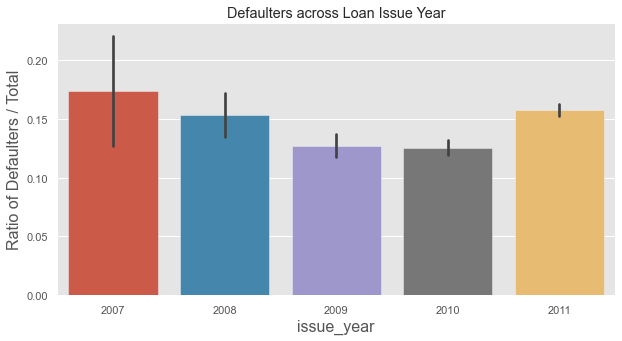

In [541]:
# Defaulters across different Issue years
univariateBarPlot("issue_year","Defaulters across Loan Issue Year")

The defaulter ratio does not show much variation wrt to year in which the loan was issued.


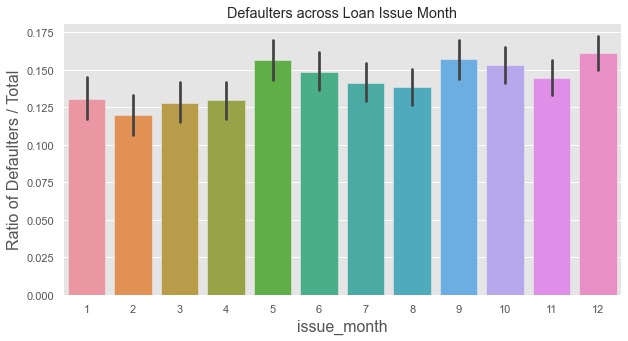

In [542]:
# Defaulters across different loan issue month
univariateBarPlot("issue_month","Defaulters across Loan Issue Month")

The defaulter ratio does not show much variation wrt to month in which the loan was issued.
Issue year and month do not seem to have a strong depenedency on defalters.

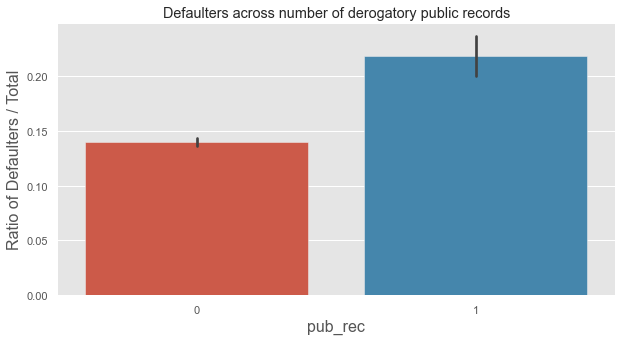

In [543]:
# Defaulters across number of derogatory public records
univariateBarPlot("pub_rec","Defaulters across number of derogatory public records")

Defaulting across borrowers with derogatorypublic records is higher that those with no such records.

Feature which could be useful for defaulter check from the above univariate analysis :<b>
loan_amnt, int_rate, term, installment, annual_inc, pub_rec, dti,purpose, grade and sub_grade.</b>



<h3>Bivariate Analysis</h3>

Plotting function for bivariate bar graph

In [544]:
def bivariateBarPlot(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loans)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Ratio of Defaulter / Total", fontsize=16)
    plt.show()

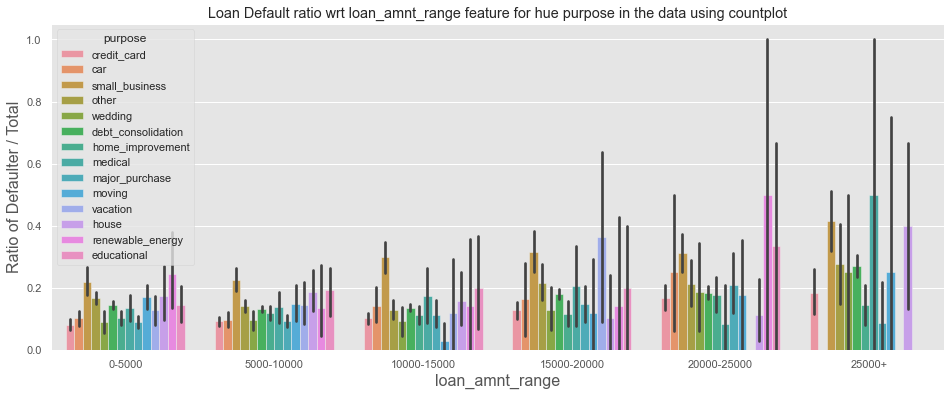

In [545]:
# Defaulters across loan amount range and loan purpose

bivariateBarPlot("loan_amnt_range", "purpose")

The defaulters ratio increases for every purpose with increase in loan amount.

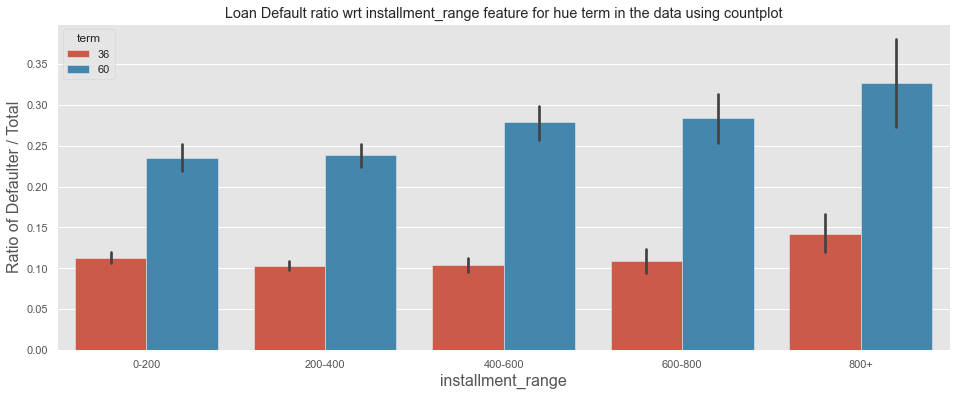

In [546]:
# Defaulters across installment range and loan term
bivariateBarPlot("installment_range", "term")

The defaulter ratio increases with increase in the installment amount, especially for loans with longer terms.

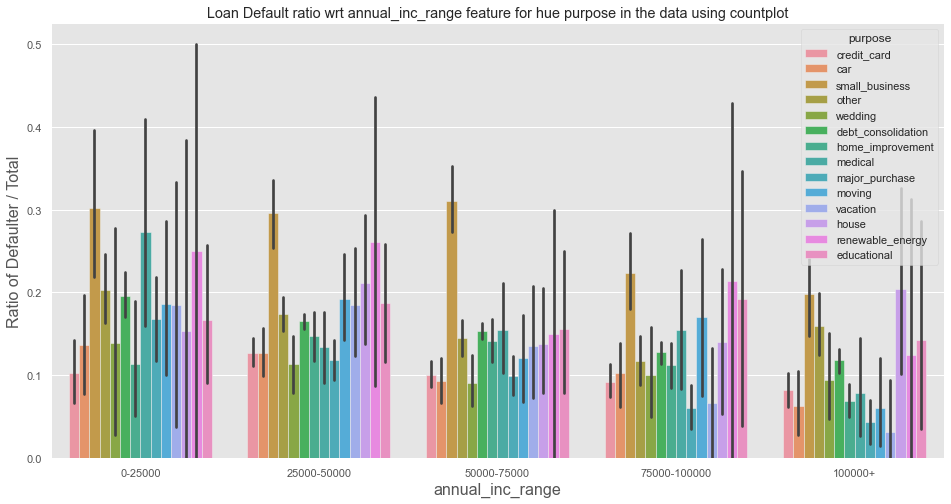

In [547]:
# Defaulters across annual_inc_range and loan purpose
bivariateBarPlot("annual_inc_range", "purpose",figsize=(16,8))

Higher annual income leads to less defaulters for every purpose.

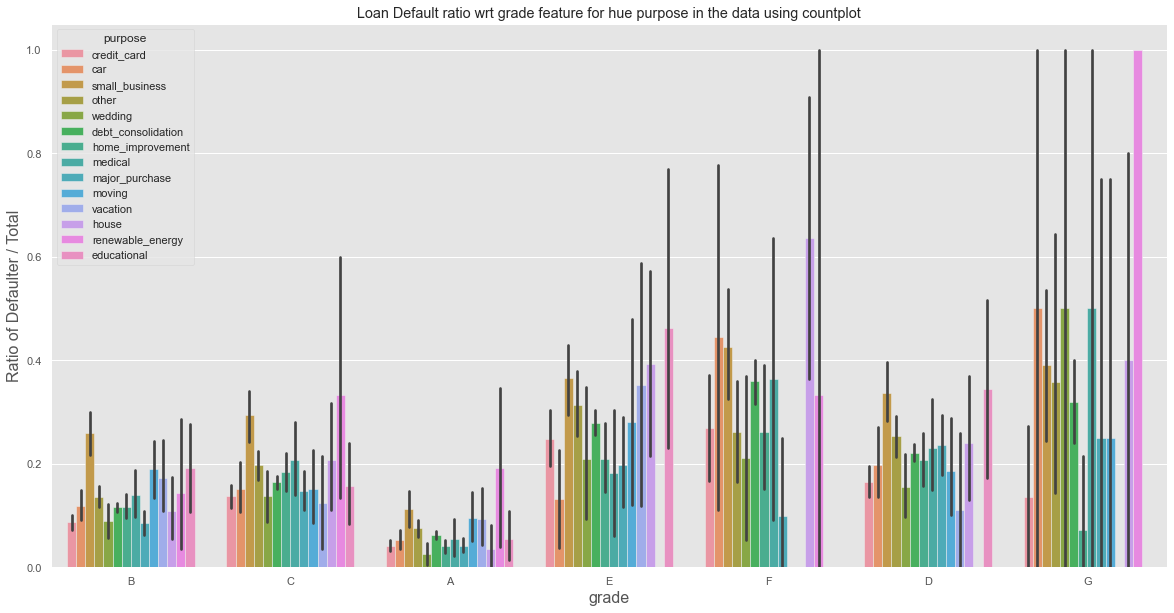

In [548]:
# Defaulters across grade and loan purpose
bivariateBarPlot("grade", "purpose", figsize=(20,10))

The defaulter ratio increases wrt the grade (less defaulters for better grade) for every purpose.

Plotting function for box plots

In [549]:
# function to plot boxplot for comparing two features
def bivariateBoxPlot(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=loans, hue=hue, order=sorted(loans[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

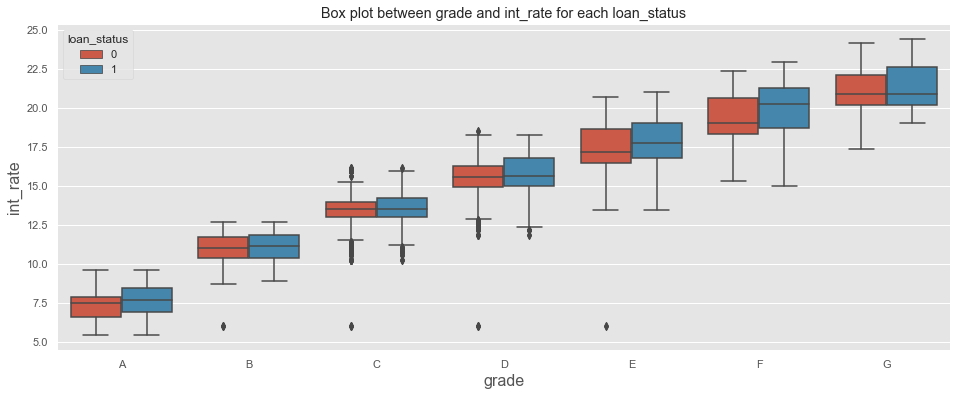

In [550]:
# Boxplot for grade vs int_rate for each loan_status
bivariateBoxPlot("grade", "int_rate", "loan_status")

The interest rate increases with lower grades( going from A to G, with A being best grade).
Also the interest rates within a particular grade seem to be higher for the defaulters than the non defaulters.

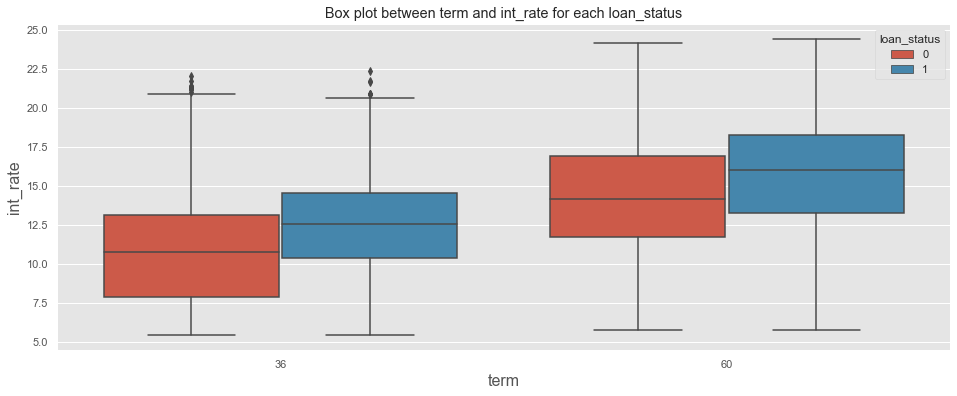

In [551]:
# Boxplot for term vs int_rate for each loan_status
bivariateBoxPlot("term", "int_rate")

The interest rate for 60 month term is higher. For a particular term the defaulters have a higher interest rate.

Feature which could be useful for defaulter check using the above univariate analysis : <b>loan_amnt, int_rate, term, purpose, installment, annual_inc, grade and sub_grade.</b>

<h3>Multivariate Analysis</h3>

Correlation Heatmap

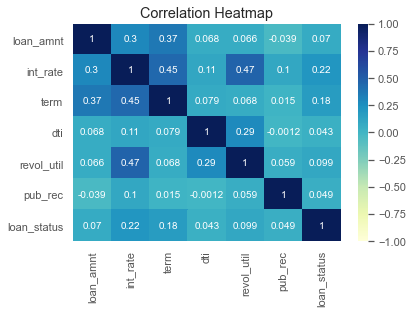

In [552]:
# plot heat map to see correlation between features
continuous_f = [ "loan_amnt","int_rate", "term", "dti", "revol_util","pub_rec",  "loan_status"]
loan_corr = loans[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

There is not a high level of correlation between the above columns and hence should be considered for analysis.

Pair Plor

In [553]:
multi_analysis_cols=["loan_amnt","dti","annual_inc","int_rate","loan_status"]
# l1=loans[]

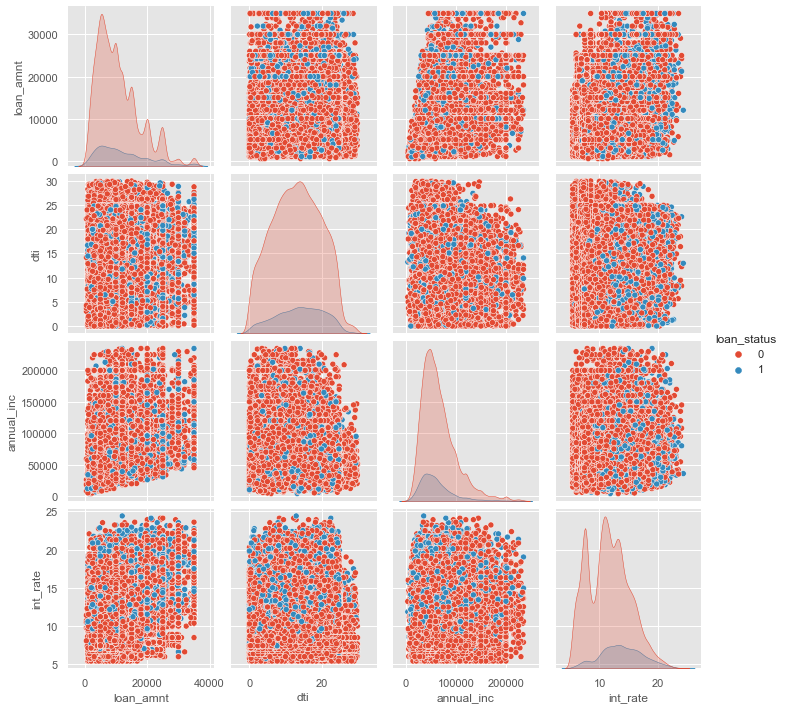

In [554]:
#Loan status 1 represents defaulters
#Loan status 0 represnts full paid loans

sns.pairplot(loans[multi_analysis_cols], hue="loan_status")

Feature which could be useful for defaulter check using the above univariate analysis :<b> loan_amnt, annual_inc, int_rate, term, dti, pub_rec.</b>

<h3>Analysis Findings</h3>

The features that seem to have a significant impact on defaulting on payments are :<b> loan_amnt, annual_inc, grade, purpose, int_rate, term, dti, pub_rec.</b>